# **THE SPARKS FOUNDATION - INTERNSHIP**


**TASK 1 - Prediction using Supervised ML**

Predict the percentage of an student based on the no. of study hours.
This is a simple linear regression task as it involves just 2 variables.


What will be predicted score if a student studies for 9.25 hrs/ day?







***Author- Koduru Saumya Naveen***

In [ ]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print("All the required libraries have been imported")

All the required libraries have been imported


In [ ]:
# Loading the Dataset
data = pd.read_csv('http://bit.ly/w-data')
print("Dataset Loaded")

Dataset Loaded


In [ ]:
#The method shape returns the Row and Column of the given dataset.
data.shape

(25, 2)

In [ ]:
#Return the first n rows
data.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
#summary statistics
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


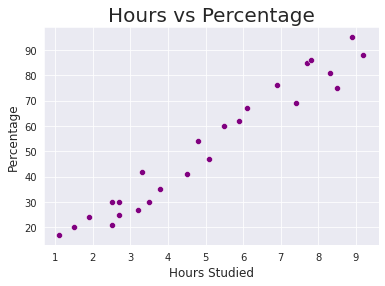

In [ ]:
# We will plot a scatter plot to see if there is any correlation between'Percentage' and 'Hours Studied'
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'],color='purple')
plt.title('Hours vs Percentage',size=20)
plt.ylabel('Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

In [ ]:
# Checking for the correlation between the variables Hours and Scores
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


From the above graph we can find some correlation between 'Marks Percentage' and 'Hours Studied'. Further, we will plot a regression line to predict the Marks percentage for the given value of Hours studied

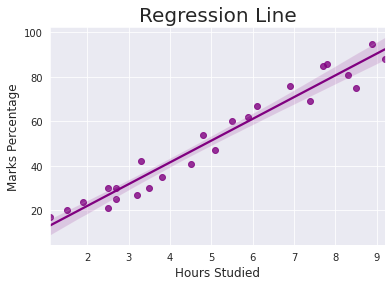

In [ ]:
sns.regplot(x= data['Hours'], y= data['Scores'],color='purple')
plt.title('Regression Line',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()


From the above regression plot we can see that both the variables are moving in the same direction which confirms that it is positively correlated

**Model Preparation and Testing**

**1) Preparing the Data**

In [ ]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values


In [ ]:
print("-------List of hours studied--------")
X

-------List of hours studied--------


array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [ ]:
print("-------List of scores obtained--------")
y

-------List of scores obtained--------


array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

**Spliting the data set**

In [ ]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
train_X

array([[7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [ ]:
print("X test data")
val_X

X test data


array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9],
       [3.8],
       [1.9]])

In [ ]:
train_y

array([86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21, 54, 95,
       41])

In [ ]:
print("y test data")
val_y

y test data


array([20, 27, 69, 30, 62, 35, 24])

**2) Training Data**

In [ ]:
regression = LinearRegression()
regression.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


**3) Predicting the Percentage of Marks**

In [ ]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


**4) Comparing the Predicted Marks with the Actual Marks**

In [ ]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393



**5) Visually analyzing Predicted Marks with the Actual Marks**

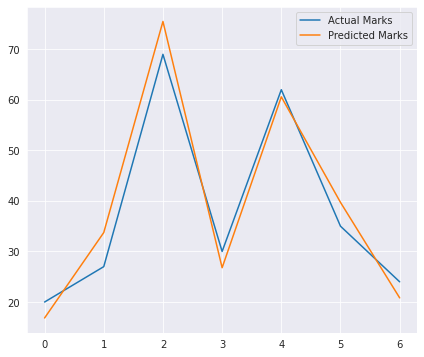

In [ ]:
sns.set_style('darkgrid')
compare_scores.plot(kind='line',figsize=(7,6))


**Evaluating the Model**

In [ ]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502482


**TSF Question -What will be predicted score if a student studies for 9.25 hrs/ day?**

In [ ]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


**CONCLUSION**



1.   From the obtained regression model it can be clearly seen that if a student studies for 9.25 hours a day, student is likely to score 93.893 marks
2.   Also the model has good accuracy since the mean absolute error is less

